In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy as np

def total_distance(data):
    #The total distance between each pair of consecutive cities in the tour.
    return sum(dist(data[i], data[i-1]) 
               for i in range(len(data)))

def dist(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

def sum_distance(data,tour):
    sd = 0
    for i in range(len(tour)):
        sd = sd + dist(data[tour[i-1]],data[tour[i]])
    return sd

def find_cloest(data, i):
    data_i = data[i]
    new_data = np.delete(data, i, 0)
    cloest = dist(data_i, new_data[0])
    num_cloest = np.where(data == new_data[0])
    for j in range(1,len(new_data)): 
        new_cloest = dist(data_i, new_data[j])
        if new_cloest < cloest:
            cloest = new_cloest
            num_cloest = np.where(data == new_data[j])
    return num_cloest[0][0]

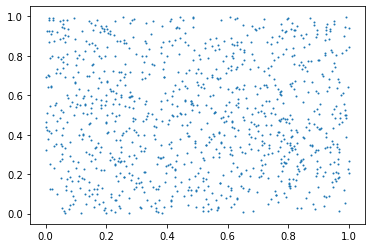

In [2]:
data = np.loadtxt('tsp.txt')

x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y, s=1)
plt.show()


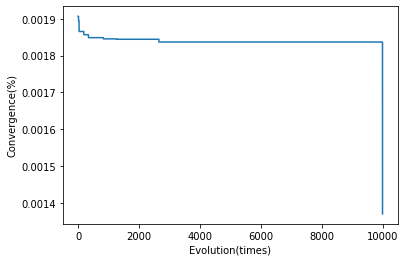

In [13]:
tour = random.sample(range(1000),1000)
shortest = sum_distance(data,tour)
Short = []
I = []
for i in range (10000):
    np.random.shuffle(tour)
    shortest_new = sum_distance(data,tour)
    if shortest < shortest_new:
        shortest = shortest_new
    Short.append(1/shortest)
    I.append(i)
Short.append(1/730)
I.append(i+1)
    
plt.xlabel('Evolution(times)')
plt.ylabel('Convergence(%)')
plt.plot(I,Short) 
plt.show()


In [11]:
from IPython.display import Image


548.0913649923574


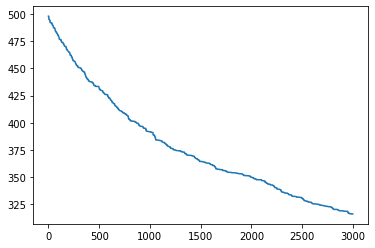

315.89444951575103


In [5]:
Distances = np.array([])

tour = random.sample(range(1000),1000)
#tour = list(range(1000))

oldDistance = sum_distance(data,tour)
Distances = np.append(Distances, np.array([0,oldDistance]))

#random search
for pp in range(3000):
    [i,j] = sorted(random.sample(range(1000),2))
    newTour =  tour[:i] + tour[j:j+1] +  tour[i+1:j] + tour[i:i+1] + tour[j+1:]
    newDistance = sum_distance(data,newTour)
    if newDistance < oldDistance:
        oldDistance = newDistance
        tour = newTour
    Distances = np.vstack((Distances, np.array([pp,oldDistance])))
#plt.plot([data[tour[i % 1000]][0] for i in range(1001)], [data[tour[i % 1000]][1] for i in range(1001)], 'xb-');
plt.plot(Distances[:,0],Distances[:,1])
plt.show()
#print (Distances)
print (sum_distance(data,tour))

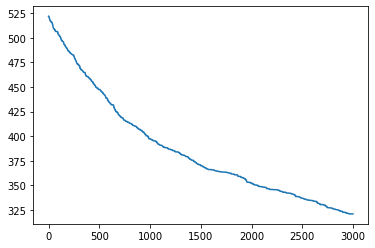

321.1277200263961


In [6]:
Distances = np.array([])

tour = random.sample(range(1000),1000)
#tour = list(range(1000))

oldDistance = sum_distance(data,tour)
Distances = np.append(Distances, np.array([0,oldDistance]))

n = len(data)
#hill climber
for pp in range(3000):
    i = random.randint(0,n-1)
    j = find_cloest(data, i)
    [i, j] = np.sort([i,j])
    if i == 0 and j == n:
        i, j = j, i
    if (i + 1)%len(data) != j:
        newTour =  tour[:i+1] + tour[j:j+1] +  tour[i+1:j] + tour[j+1:];
        newDistance = sum_distance(data,newTour)
        if newDistance < oldDistance:
            oldDistance = newDistance
            tour = newTour
        Distances = np.vstack((Distances, np.array([pp,oldDistance])))
#plt.plot([data[tour[i % 1000]][0] for i in range(1001)], [data[tour[i % 1000]][1] for i in range(1001)], 'xb-');
plt.plot(Distances[:,0],Distances[:,1])
plt.show()
#print (Distances)
print (sum_distance(data,tour))

In [7]:
def greedy_TSP(data):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = random.randint(0,999)
    new_tour = [start]
    new_data = np.delete(data, new_tour, 0)
    while new_data.size > 0 :
        new_node = nearest_neighbor(data, new_data, new_tour[-1])
        new_tour.append(new_node)
        new_data = np.delete(data, new_tour, 0)
    return new_tour

def longest_TSP(data):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = random.randint(0,999)
    new_tour = [start]
    new_data = np.delete(data, new_tour, 0)
    while new_data.size > 0 :
        new_node = longest_neighbor(data, new_data, new_tour[-1])
        new_tour.append(new_node)
        new_data = np.delete(data, new_tour, 0)
    return new_tour

In [8]:
tour = greedy_TSP(data)
print (sum_distance(data, tour))
x = [data[i][0] for i in tour]
y = [data[i][1] for i in tour]
plt.plot(x, y, 'xb-')
plt.show()

NameError: name 'nearest_neighbor' is not defined

In [ ]:
print (sum_distance(data, tour))
x = [data[i][0] for i in tour]
y = [data[i][1] for i in tour]
plt.plot(x, y, 'xb-')
plt.show()

In [ ]:
tour = longest_TSP(data)
print (sum_distance(data, tour))
x = [data[i][0] for i in tour]
y = [data[i][1] for i in tour]
plt.plot(x, y, 'xb-')
plt.show()

In [ ]:
def distance_matrix(data):
    matrix= np.array([m for m in range(1000)])
    for i in range(len(data)):
        pointi = data[i]
        row = np.array([])
        for zero in range(i+1):
            row = np.append(row,0)
        for j in range(i+1,len(data)):
            row = np.append(row, dist(pointi, data[j]))
        matrix = np.vstack((matrix, row))
    matrix = np.delete(matrix,0,0)
    return matrix

In [ ]:
dd = distance_matrix(data)

In [ ]:
tour = [989, 713, 401, 539, 562, 242, 611, 556, 419, 151, 833, 203, 289, 632, 466, 938, 661, 316, 980, 762, 197, 37, 768, 377, 40, 684, 501, 257, 841, 943, 629, 905, 798, 256, 934, 736, 397, 126, 413, 273, 716, 532, 28, 465, 249, 390, 152, 952, 204, 498, 804, 453, 563, 490, 458, 757, 745, 92, 176, 815, 138, 485, 30, 480, 262, 192, 49, 161, 495, 59, 219, 792, 876, 35, 19, 971, 705, 47, 319, 927, 274, 100, 565, 545, 290, 50, 344, 546, 634, 903, 248, 467, 698, 504, 196, 329, 759, 658, 518, 245, 782, 657, 866, 752, 306, 590, 428, 664, 645, 42, 188, 875, 79, 921, 886, 540, 608, 96, 123, 700, 825, 923, 832, 603, 644, 596, 946, 166, 630, 88, 732, 678, 824, 829, 543, 238, 129, 179, 407, 991, 542, 639, 227, 139, 422, 202, 708, 828, 285, 394, 552, 933, 27, 191, 576, 297, 6, 588, 371, 839, 63, 507, 842, 198, 115, 783, 81, 359, 311, 709, 746, 894, 381, 561, 243, 133, 300, 111, 264, 173, 733, 425, 261, 361, 209, 831, 641, 48, 930, 544, 414, 1, 521, 948, 915, 3, 811, 781, 494, 318, 54, 45, 408, 635, 302, 355, 748, 69, 445, 105, 106, 646, 322, 332, 396, 168, 432, 945, 818, 169, 983, 694, 252, 936, 668, 189, 109, 427, 516, 577, 917, 680, 479, 502, 793, 996, 553, 116, 363, 924, 846, 446, 953, 10, 236, 890, 772, 228, 347, 710, 375, 348, 973, 536, 497, 673, 911, 65, 187, 278, 525, 530, 956, 146, 758, 222, 642, 263, 819, 606, 358, 488, 25, 840, 71, 648, 963, 95, 754, 36, 143, 368, 354, 741, 513, 859, 251, 653, 615, 67, 652, 519, 885, 981, 537, 849, 926, 510, 855, 14, 860, 357, 579, 181, 835, 660, 712, 865, 651, 277, 416, 636, 144, 281, 617, 974, 847, 922, 385, 175, 817, 87, 333, 912, 130, 918, 298, 68, 830, 610, 190, 475, 670, 614, 895, 650, 966, 349, 838, 844, 364, 127, 791, 379, 714, 721, 696, 341, 985, 142, 399, 999, 843, 229, 225, 220, 459, 199, 942, 457, 374, 801, 15, 424, 993, 982, 789, 794, 595, 478, 582, 491, 932, 426, 260, 214, 853, 340, 44, 957, 638, 120, 9, 24, 564, 836, 951, 104, 167, 717, 473, 237, 787, 616, 342, 331, 39, 55, 654, 82, 992, 29, 66, 528, 666, 990, 812, 448, 821, 725, 470, 373, 718, 570, 382, 879, 907, 436, 919, 739, 117, 215, 343, 157, 524, 889, 807, 320, 80, 640, 98, 266, 336, 124, 378, 372, 863, 383, 572, 304, 674, 647, 211, 527, 822, 916, 439, 972, 902, 503, 205, 405, 742, 184, 52, 165, 327, 162, 411, 326, 472, 743, 730, 587, 315, 850, 734, 431, 57, 665, 272, 136, 221, 686, 508, 813, 621, 283, 141, 845, 689, 870, 334, 901, 962, 720, 988, 398, 760, 557, 771, 84, 597, 484, 750, 170, 955, 271, 711, 330, 153, 62, 809, 715, 492, 935, 969, 474, 147, 434, 925, 444, 73, 554, 122, 21, 433, 533, 476, 464, 797, 429, 218, 534, 964, 325, 107, 655, 723, 119, 687, 213, 671, 675, 827, 656, 159, 867, 134, 250, 268, 224, 392, 751, 128, 837, 767, 947, 288, 628, 755, 421, 883, 520, 259, 692, 231, 41, 928, 816, 56, 976, 85, 412, 569, 8, 726, 764, 145, 908, 46, 32, 857, 585, 183, 255, 76, 799, 584, 914, 823, 461, 60, 967, 353, 877, 26, 848, 622, 275, 365, 904, 388, 613, 583, 5, 761, 878, 301, 402, 293, 605, 438, 38, 548, 685, 86, 16, 852, 296, 568, 683, 496, 887, 380, 702, 83, 351, 403, 210, 779, 182, 784, 254, 149, 7, 774, 591, 309, 244, 386, 535, 305, 566, 560, 418, 773, 631, 697, 523, 0, 975, 937, 538, 604, 738, 691, 269, 649, 994, 409, 625, 369, 893, 78, 939, 307, 601, 703, 643, 101, 463, 194, 4, 778, 53, 499, 896, 483, 959, 299, 500, 404, 77, 995, 455, 292, 620, 618, 753, 452, 223, 140, 442, 74, 719, 881, 766, 185, 667, 356, 820, 258, 899, 174, 624, 328, 441, 350, 239, 729, 633, 323, 871, 91, 659, 803, 207, 2, 512, 235, 112, 728, 93, 506, 90, 727, 462, 195, 609, 286, 574, 131, 776, 415, 186, 573, 663, 800, 769, 493, 400, 515, 206, 12, 892, 965, 785, 681, 482, 362, 308, 94, 346, 102, 954, 132, 514, 226, 567, 997, 338, 623, 267, 437, 531, 51, 808, 607, 172, 775, 558, 70, 313, 869, 826, 589, 291, 688, 931, 693, 366, 960, 178, 233, 486, 97, 575, 662, 241, 593, 447, 795, 747, 18, 449, 679, 23, 979, 884, 481, 430, 940, 551, 586, 352, 450, 763, 155, 602, 279, 312, 920, 282, 522, 253, 389, 150, 856, 756, 968, 541, 345, 154, 443, 247, 61, 487, 898, 550, 148, 864, 440, 580, 200, 177, 171, 212, 909, 888, 929, 549, 335, 944, 33, 339, 612, 489, 872, 321, 704, 626, 571, 469, 164, 699, 31, 891, 526, 598, 672, 949, 805, 676, 810, 724, 246, 216, 706, 731, 270, 788, 970, 135, 163, 749, 276, 796, 468, 873, 517, 393, 113, 722, 201, 669, 99, 862, 682, 160, 156, 913, 420, 72, 417, 505, 217, 851, 874, 423, 897, 900, 121, 11, 295, 230, 790, 265, 395, 108, 391, 511, 740, 314, 234, 137, 477, 387, 906, 555, 600, 765, 594, 978, 456, 695, 208, 786, 193, 814, 950, 384, 770, 961, 861, 64, 592, 780, 58, 559, 435, 627, 317, 110, 701, 34, 451, 17, 941, 880, 977, 180, 303, 118, 777, 599, 280, 690, 20, 547, 984, 707, 370, 858, 986, 806, 958, 13, 240, 360, 324, 376, 578, 406, 114, 294, 637, 22, 125, 43, 232, 834, 882, 103, 868, 529, 89, 737, 998, 284, 802, 454, 158, 854, 310, 410, 735, 75, 987, 337, 460, 581, 367, 677, 910, 744, 287, 471, 509, 619]

In [ ]:
sum_distance(data,tour)